In [1]:
import pandas as pd
import json
import time
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# Convert json to csv
with open('comments.json',encoding='utf-8') as jf:
    datas = json.load(jf)
    
data_file = open('comments.csv', 'w', encoding='utf-8')
# create the csv writer object 
csv_writer = csv.writer(data_file)

# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for data in datas: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = data.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(data.values()) 
  
data_file.close() 

In [3]:
# read data open file json
import json 
with open('comments.json',encoding='utf-8') as f:
    data_cmts = json.loads(f.read())
len(data_cmts)

88527

In [4]:
data_cmt = pd.read_csv('comments.csv', encoding='utf-8')
data_cmt

,rate,content,link
0,5,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
1,5,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
2,5,Tuổi thơ lớn lên cùng những cuốn truyện của Ng...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
3,5,Truyện này của NNA khác hẳn với những truyện k...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
4,3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
...,...,...,...
88522,5,Sách mang hơi hướng của thể loại khoa học viễn...,https://tiki.vn/chua-da-zaggla-tap-2-tran-quye...
88523,5,"Sách đẹp, dày, bao bì cẩn thận nhưng lại bị lỗ...",https://tiki.vn/chua-da-zaggla-tap-2-tran-quye...
88524,5,sách thì mình chưa đọc nhưng đã đọc phần 1 của...,https://tiki.vn/chua-da-zaggla-tap-2-tran-quye...
88525,5,Cực kỳ hài lòng,https://tiki.vn/chua-da-zaggla-tap-2-tran-quye...


## Thống kê bình luận theo số lượng rate

In [5]:
rates = np.array(data_cmt['rate'], dtype='int64')
rate_xlabel = [i for i in range(1,6)]
print(rate_xlabel)
rate_data = []
for i in range(1,6):
    rate_data.append(np.count_nonzero( rates == i))

[1, 2, 3, 4, 5]


In [6]:
rate_data

[6421, 5482, 5363, 11935, 59326]

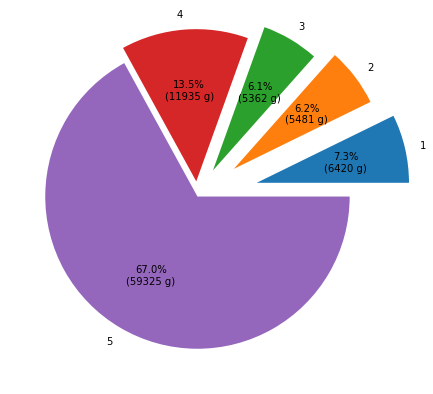

In [7]:
explode = (0.4, 0.3, 0.2, 0.1, 0.0)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(rate_data,
        autopct = lambda pct: func(pct, rate_data), 
        explode = explode,
        labels = rate_xlabel) 
plt.show()

### Đánh giá
**7,3%** đánh giá 1 sao, 
**6,2%** đánh giá 2 sao,
**6,1%** đánh giá 3 sao,
**13,5%** đánh giá 4 sao,
**67%** đánh giá 5 sao 

## Đánh giá sản phẩm (tốt, không tốt, trung bình) 

In [8]:
links = data_cmt['link']
i = 0
list_books = []
list_books.append(links[i])
count = 1
# while i < 77982:
#     if links[i] == links[i+1]:
#         i += 1
#     else:
#         list_books.append(links[i+1])
#         i +=1
for i in range(1,len(data_cmts)):
    if links[i] == links[i-1]:
        count += 0
    else:
        list_books.append(links[i])
        count += 1
count

9496

In [9]:
print(len(list_books))

9496


In [10]:
def countmaxcmt(rate):
    good_cmt = rate.count(5) + rate.count(4) 
    tb_cmt = rate.count(3)
    bad_cmt = rate.count(1) + rate.count(2)
    tg = [good_cmt, tb_cmt, bad_cmt ]
    if max(tg) == good_cmt:
        return 1
    elif max(tg) == tb_cmt: 
        return 2
    else:
        return 0
        

In [11]:
rate_cmt = []
list_item = []
i = 0 
for index,item in enumerate(data_cmts):
   if item['link'] == list_books[i]:
        rate_cmt.append(item['rate'])
   elif (i < count):
        r = countmaxcmt(rate_cmt)
        list_item.append(r)
        rate_cmt = []
        i += 1
        rate_cmt.append(item['rate'])
#    elif i == 5195:
#         rate_cmt.append(item['rate'])
#    elif index == len(data_cmts):
#         rate_cmt.append(item['rate'])
#         r = countmaxcmt(rate_cmt)
#         list_item.append(r)
        

In [12]:
rate_items = np.array(list_item, dtype='int64')
rate_item_xlabel = ['Không tốt', 'Tốt', 'Trung Bình']
rate_item_data = []
for i in range(0,3):
    rate_item_data.append(np.count_nonzero( rate_items == i))

In [13]:
rate_item_data

[595, 8877, 23]

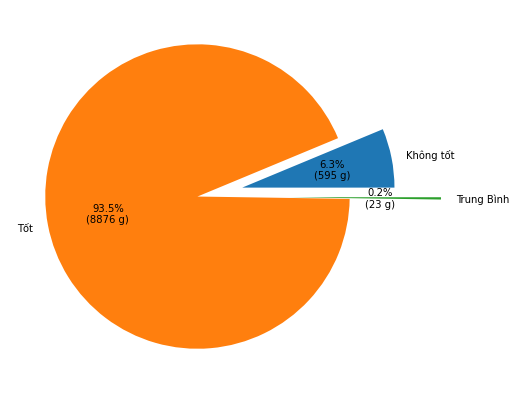

In [22]:
explode = (0.3,0.0, 0.6)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(rate_item_data,
        autopct = lambda pct: func(pct, rate_item_data), 
        explode = explode,
        labels = rate_item_xlabel) 
plt.show()

### Đánh giá kết quả
**93,5%** sản phẩm được đánh giá tốt,
**6,3%** sản phẩm được đánh giá không tốt,
**0,2%** sản phẩm được đánh giá trung bình

## Đánh giá sản phẩm theo số rate lớn nhất

In [15]:
def countmaxratecmt(rate):
    cmt_5 = rate.count(5)
    cmt_4 = rate.count(4)
    cmt_3 = rate.count(3)
    cmt_2 = rate.count(2)
    cmt_1 = rate.count(1)
    tg = [cmt_5, cmt_4, cmt_3, cmt_2, cmt_1 ]
    if max(tg) == cmt_5:
        return 5
    elif max(tg) == cmt_4: 
        return 4
    elif max(tg) == cmt_3: 
        return 3
    elif max(tg) == cmt_2: 
        return 2
    else:
        return 1
        

In [16]:
rate_cmt = []
list_item_rate = []
i = 0 
for index,item in enumerate(data_cmts):
   if item['link'] == list_books[i]:
        rate_cmt.append(item['rate'])
   elif (i < count):
        r = countmaxratecmt(rate_cmt)
        list_item_rate.append(r)
        rate_cmt = []
        i += 1
        rate_cmt.append(item['rate'])

In [17]:
rate_c = np.array(list_item_rate, dtype='int64')
rate_c_xlabel = [i for i in range(1,6)]
rate_c_data = []
for i in range(1,6):
    rate_c_data.append(np.count_nonzero( rate_c == i))

In [19]:
rate_c_data

[103, 239, 52, 216, 8885]

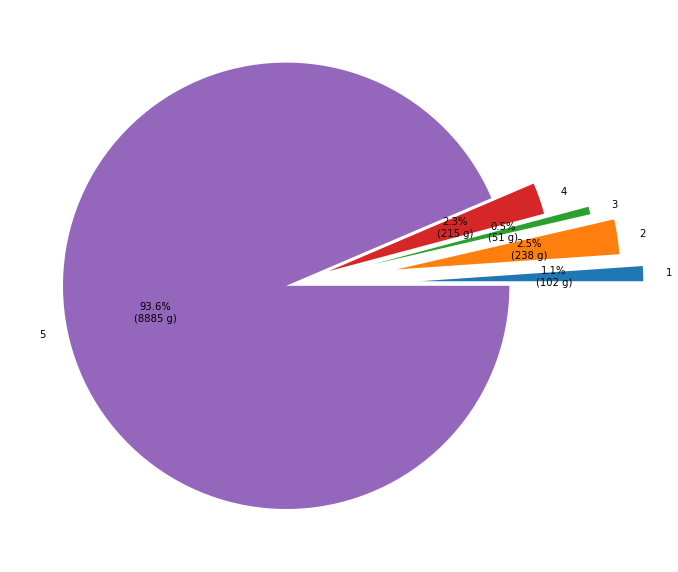

In [21]:
explode = (0.6, 0.5, 0.4, 0.2, 0.0)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 11)) 
plt.pie(rate_c_data,
        autopct = lambda pct: func(pct, rate_c_data), 
        explode = explode,
        labels = rate_c_xlabel) 
plt.show()

### Đánh giá 
**1,1%** đánh giá 1 sao, 
**2,5%** đánh giá 2 sao,
**0,5%** đánh giá 3 sao,
**2,3%** đánh giá 4 sao,
**93,6%** đánh giá 5 sao 